#**Part.a) Building a 3 layer neural network using pure numpy using relu for non-linearity**

In [20]:
import numpy as np

###Generating 3 dimensional data


In [45]:
#creating 3-d non linear data

n_samples = 200
d = 3
x = np.random.uniform(-1, 1, (n_samples, d))

weights_true = np.array([[5, 1, 6], [1, 6, 1]]).T
bias_true = np.array([1, 1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

x: (200, 3), weights: (3, 2), bias: (2,), y: (200, 2)


###Plotting the data

In [55]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_3d(x, y, y_pred=None):
  X_embedded = TSNE(n_components=2).fit_transform(x)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(X_embedded[:, 0], X_embedded[:, 1], y, label='underlying function') 
  if y_pred is not None:
    ax.scatter(X_embedded[:, 0], X_embedded[:, 1], y_pred, label='our function')
  plt.legend()

###Plotting both the labels in y_true

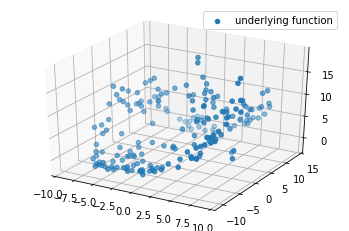

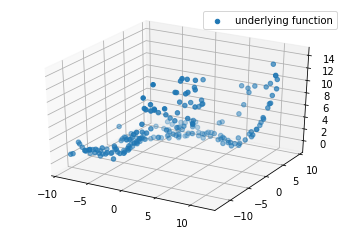

In [56]:
plot_3d(x, y_true[:, 0])
plot_3d(x, y_true[:, 1])

##Specifying all the necessary functions and defining 3 Layer neural network with pure Numpy





###Loss Function

In [65]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()
  
  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient

###We are going to use gradient descent to learn the weights and bias that minimize the loss. 

In [66]:
class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)

  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output
  
  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient
  
  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

###Adding non-linearity using ReLU

In [67]:
class Relu:
  def __call__(self, input_):
    self.input_ = input_
    self.output = np.clip(self.input_, 0, None)
    return self.output
  
  def backward(self, output_gradient):
    self.input_gradient = (self.input_ > 0) * output_gradient
    return self.input_gradient

###Defining model class

In [68]:
#Building a 3 Layer Neural Network model. Choosing 10 neurons as the hidden layer neurons. Output is 2

class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu1 = Relu()
    self.linear2 = Linear(num_hidden, 10)
    self.relu2 = Relu()
    self.linear3 = Linear(10, 2)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r1= self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3
  
  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear3_gradient)
    linear2_gradient = self.linear2.backward(relu2_gradient)
    relu1_gradient = self.relu1.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu1_gradient)
    return linear1_gradient
  
  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

###Defining the fit method and training the model

In [75]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)

fit(x, y_true, model=model, loss=loss, lr=0.2, num_epochs=500)

Epoch 0, loss 39.597727083224505
MSE backward (200, 2) (200, 2) (200, 2)
Epoch 1, loss 121.74595688182424
MSE backward (200, 2) (200, 2) (200, 2)
Epoch 2, loss 69.68621365522512
MSE backward (200, 2) (200, 2) (200, 2)
Epoch 3, loss 47.81455375771276
MSE backward (200, 2) (200, 2) (200, 2)
Epoch 4, loss 29.746461044776744
MSE backward (200, 2) (200, 2) (200, 2)
Epoch 5, loss 23.591315771759582
MSE backward (200, 2) (200, 2) (200, 2)
Epoch 6, loss 21.375463473473403
MSE backward (200, 2) (200, 2) (200, 2)
Epoch 7, loss 20.577756646090375
MSE backward (200, 2) (200, 2) (200, 2)
Epoch 8, loss 20.290582188232484
MSE backward (200, 2) (200, 2) (200, 2)
Epoch 9, loss 20.18719938340364
MSE backward (200, 2) (200, 2) (200, 2)
Epoch 10, loss 20.14998157366526
MSE backward (200, 2) (200, 2) (200, 2)
Epoch 11, loss 20.136583162159447
MSE backward (200, 2) (200, 2) (200, 2)
Epoch 12, loss 20.131759734017347
MSE backward (200, 2) (200, 2) (200, 2)
Epoch 13, loss 20.130023299886194
MSE backward (200,

###plotting y_true and y_pred for both the labels



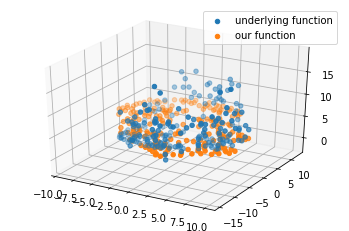

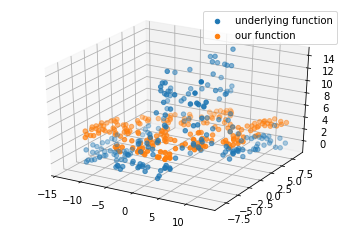

In [76]:
plot_3d(x, y_true[:, 0], model(x)[:, 0])
plot_3d(x, y_true[:, 1], model(x)[:, 1])